In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("exchange.csv",  header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [3]:
df.head()

,GBP/USD Close
Date,
1998-12-31,88.67
1999-01-01,88.67
1999-01-04,85.60
1999-01-05,83.95
1999-01-06,86.96


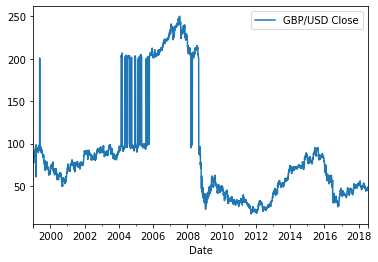

In [4]:
df.plot()
plt.show()

In [ ]:
#Weighted moving average

optimal_n = None
best_mse = None
db = df.iloc[:, :].values.astype('float32')
mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))
for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0, len(db) - n):
        weight = 1
        divider = 0
        result = 0
        for data in db[:, 0][i:i+n]:
            result += data * weight
            divider += weight
            weight += 1
        obs = result / divider
        mean_for_n[i] = np.power(obs - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)
print("Best MSE = %s" % best_mse)
print("Optimal n = %s" % optimal_n)

In [ ]:
weight = 1
divider = 0
result = 0
for data in db[:, 0][len(db) - optimal_n: len(db)]:
    result += data * weight
    divider += weight
    weight += 1
next_observation =  result / divider
print("MA = %s" % next_observation)

Forecast evaluation

In [ ]:
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        weight = 1
        divider = 0
        result = 0
        for data in db[:, 0][i: i + optimal_n]:
            result += data * weight
            divider += weight
            weight += 1
        forecast[i+optimal_n] = result / divider
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()